In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


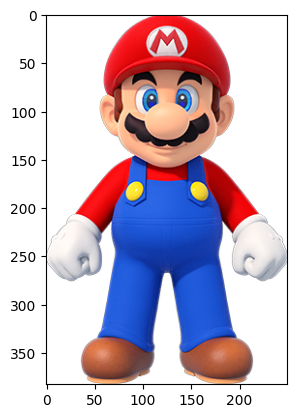

In [ ]:
img = plt.imread('/content/drive/MyDrive/images/mario.png')
plt.imshow(img)

In [ ]:
def filters(image):
    
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) #horizontal_filter
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) #vertical_filter

    grad_x = convolve2D(image, kernel_x)
    grad_y = convolve2D(image, kernel_y)

    grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

    return grad_magnitude

In [ ]:
def convolve2D(image, kernel):
    
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Computing the padding for convolution
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Creating a padded image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='edge')

    # Creating an output array for the convolved image
    convolved_image = np.zeros_like(image)

    # convolution
    for i in range(image_height):
        for j in range(image_width):
            convolved_image[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return convolved_image

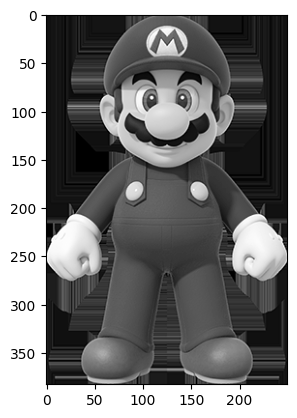

In [ ]:
# converting the image to grayscale if it's in color
if img.ndim == 3:
    img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
edges = filters(img)

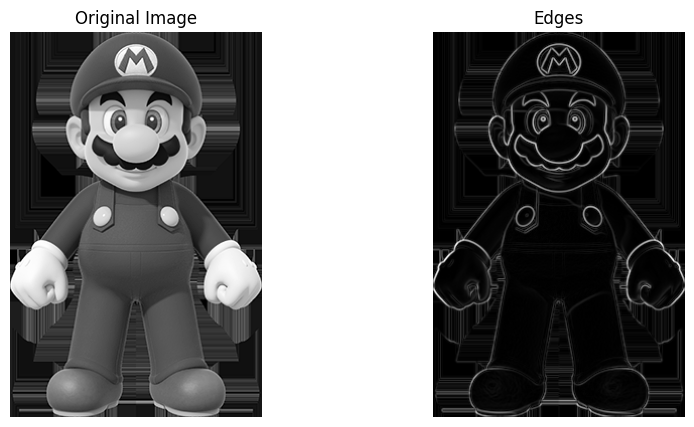

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Edges')
axs[1].axis('off')

# Show the plot
plt.show()